<a href="https://colab.research.google.com/github/Azariagmt/Twitter-Data-Analysis/blob/main/data_science_workflow_and_model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project:** Twitter sentiment analysis project on COVID dataset

### Main objectives of this project

In [8]:
main_objectives = ''' Analyze people's sentiments on COVID data using specific keywords and
find if the tweet has positive, negative or neutral sentiment.'''

In [16]:
assert len(main_objectives) < 500 , "main_objectives should be less than 150"
assert len(main_objectives) > 80 , "main_objectives should be greater than 100"
# silence is the best truth if it passes then it says nothing

### Different data analysis steps you will follow to carry out the project

In [ ]:
dm_outline = '''
Business understanding (BU): 
  COVID-19 is a pandemic that has affected everyone's lives globally and has left a scar in many people's memories that will be remembered in history books. Although
  vaccines have been found and restrictive measures are being lifted in different parts of the world here in Africa we are still seeing the highest number of cases being
  recorded. And the lack of ability to produce the vaccines and the economy to purchase them shows that Africa's dark days of covid might still be ahead. Understanding
  the different sentiments that exist in tweets about covid-19 here in Africa is an essential task in identifying and implementing preventive or proactive measures
  in the times to come.

Data understanding (DU):
  From the tweepy API we can pass in specific keywords and get back a json object containint the tweet with those specific keyword. The 
  The data is a messy json object with many properties and indexation levels that requires a lot of data wrangling. 

Data preparation (DP): 
  The json object will be parsed into a proper csv format to be parsed in into a notebook using the pandas library to do different data analysis tasks and modelling.
  We need to prepare our data properly for the sentiment model we'll be building in the end. We need to select essential columns (polarity and original text) in this case 
  and do basic text preprocessing like removing punctuation, removing stopwords, converting to lowercase and stemming.

Modeling (M): 
  We will build an SGDClassifier model from the training data we have prepared in the Data preparation phase.
  
Evaluation (E): 
  Because this is a classification problem we will use evaluation metrics such as accuracy, precision, f1-score and recall. Which metric we end up using depends
  on the imbalance of the data and different factors we'll weigh in in the data analysis phase

Deployment (D): 
  Our final deployed predictive model will be a flask app deployed on Microsoft Azure app service. Containerizing the application is a requirement to not run into
  errors later on, help manage our dependencies and have an easy deployment. The docker image will be publicly available on dockerhub for anyone to download and use.
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
equations of the metrics to be used

Accuracy = $\frac{(TP+TN)}{(TP+FP+FN+TN)}$
<br>
Precision = $\frac{TP}{(TP + FP)}$
<br>
Recall = $\frac{TP}{(TP+FN)}$
<br>
F1 Score = $\frac{(2\times(Recall \times Precision))} {(Recall + Precision)}$

In [12]:
why_metrics = '''
Accuracy: Because it is the most intuitive of the metrics used for a classification problem and tells us ratio of correctly
          predicted predictions. Accuracy may not be the best metric when used in an imbalanced dataset tho
Precision:  ratio of correctly predicted positive observations to the total predicted positive observations. To answer
        the question of how many positive sentiments has the model classified in accordance to the actuall true sentiments
Recall: ratio of correctly predicted positive observations to the all observations in actual class. To answer the question
      of the actual positive sentiments how many were labeled correctly
F1 Score: to take into account both false positives and false negatives into account. and as it might give a better indication
      than accuracy on imbalanced class.
'''

In [13]:
assert len(why_metrics) > 100 

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [14]:
how_success = '''
If the features we've selected actually help build a good predictive model. To check if our model is a good predictive model
we will first split the data into training and testing set.This split allows us to have separation between data used to
train the model and data used to evaluate the model(check that it can actually predict the sentiment). After building the
model we will predict using the test data and using the above classification metrics we can see how accurate or precise the model is.
'''

In [15]:
assert len(how_success) > 100 

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [ ]:
challenge_text = '''
Challenge 1: 
'''

In [ ]:
assert len(challenge_text) > 100 , "too small of a challenges scoped"

# Model Building

## Import required packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/processed_tweet_data.csv')

In [ ]:
df.head()

,created_at,source,polarity,subjectivity,original_text,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",0.166667,0.188889,"🚨Africa is ""in the midst of a full-blown third...",en,548.0,612.0,ketuesriche,551,351,NaN,[],"[{'screen_name': 'WHOAFRO', 'name': 'WHO Afric...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.133333,0.455556,"Dr Moeti is head of WHO in Africa, and one of ...",en,195.0,92.0,Grid1949,66,92,NaN,[],[],"Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",0.316667,0.483333,Thank you @research2note for creating this ama...,en,2.0,1.0,LeeTomlinson8,1195,1176,NaN,"[{'text': 'red4research', 'indices': [87, 100]}]","[{'screen_name': 'Research2note', 'name': 'Res...",NaN
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0.086111,0.197222,"Former Pfizer VP and Virologist, Dr. Michael Y...",en,1580.0,899.0,RIPNY08,2666,2704,NaN,"[{'text': 'Covid19', 'indices': [145, 153]}]",[],NaN
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",0.280000,0.620000,I think it’s important that we don’t sell COVA...,en,72.0,20.0,pash22,28250,30819,NaN,[],"[{'screen_name': 'TexasChildrens', 'name': ""Te...",United Kingdom


In [ ]:
# Form a new data frame (named cleanTweet), containing columns  clean-text  and  polarity .
cleanTweet = df[['polarity', 'original_text']]
cleanTweet.head()

,polarity,original_text
0,0.166667,"🚨Africa is ""in the midst of a full-blown third..."
1,0.133333,"Dr Moeti is head of WHO in Africa, and one of ..."
2,0.316667,Thank you @research2note for creating this ama...
3,0.086111,"Former Pfizer VP and Virologist, Dr. Michael Y..."
4,0.280000,I think it’s important that we don’t sell COVA...


### Basic preprocessing


In [ ]:
cleanTweet.dtypes

polarity         float64
original_text     object
dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
# from nltk.corpus import stopwords
stop = stopwords.words('english')

# convert all original_text fields to strings
cleanTweet['original_text'] = cleanTweet['original_text'].astype(str)
cleanTweet['clean_text'] = cleanTweet['original_text'].str.replace('[^\w\s]','')
cleanTweet['clean_text'] = cleanTweet['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
cleanTweet['clean_text'] = cleanTweet['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Lines 4 to 6
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
cleanTweet['clean_text'] = cleanTweet['clean_text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

cleanTweet[['polarity','original_text','clean_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,polarity,original_text,clean_text
0,0.166667,"🚨Africa is ""in the midst of a full-blown third...",africa midst fullblown third wave coronaviru h...
1,0.133333,"Dr Moeti is head of WHO in Africa, and one of ...",dr moeti head who africa one best public healt...
2,0.316667,Thank you @research2note for creating this ama...,thank research2not creat amaz campaign amp tur...
3,0.086111,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp virologist dr michael yeadon ...
4,0.280000,I think it’s important that we don’t sell COVA...,i think import dont sell covax short it still ...


In [ ]:
# Write a function text_category that takes a value p and returns, depending on the value of p, a string 'positive', 'negative' or 'neutral'.

def text_category(p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else: return 'neutral'

In [ ]:
# Apply this function (text_category) on the  polarity  column of cleanTweet in 1 above to form a new column called  score  in cleanTweet.

scores = pd.Series([text_category(row_val) for row_val in cleanTweet['polarity']])
cleanTweet = pd.concat([cleanTweet, scores.rename("score")], axis=1)
cleanTweet.head()

,polarity,original_text,clean_text,score
0,0.166667,"🚨Africa is ""in the midst of a full-blown third...",africa midst fullblown third wave coronaviru h...,positive
1,0.133333,"Dr Moeti is head of WHO in Africa, and one of ...",dr moeti head who africa one best public healt...,positive
2,0.316667,Thank you @research2note for creating this ama...,thank research2not creat amaz campaign amp tur...,positive
3,0.086111,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp virologist dr michael yeadon ...,positive
4,0.280000,I think it’s important that we don’t sell COVA...,i think import dont sell covax short it still ...,positive


In [ ]:
cleanTweet

,polarity,original_text,clean_text,score
0,0.166667,"🚨Africa is ""in the midst of a full-blown third...",africa midst fullblown third wave coronaviru h...,positive
1,0.133333,"Dr Moeti is head of WHO in Africa, and one of ...",dr moeti head who africa one best public healt...,positive
2,0.316667,Thank you @research2note for creating this ama...,thank research2not creat amaz campaign amp tur...,positive
3,0.086111,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp virologist dr michael yeadon ...,positive
4,0.280000,I think it’s important that we don’t sell COVA...,i think import dont sell covax short it still ...,positive
...,...,...,...,...
3715,0.100000,"204,344 #COVID19 vaccines have been administer...",204344 covid19 vaccin administ far today ontar...,positive
3716,-0.386111,"🚨Africa is ""in the midst of a full-blown third...",africa midst fullblown third wave coronaviru h...,negative
3717,-0.050000,I’m pleased to welcome the #WeCanDoThis bus to...,im pleas welcom wecandothi bu atlanta today re...,negative
3718,0.086111,"In this interview, I discuss the possible lab ...",in interview i discuss possibl lab origin sars...,positive


In [ ]:
print(len(cleanTweet[cleanTweet['score'] == "positive"]))

2786


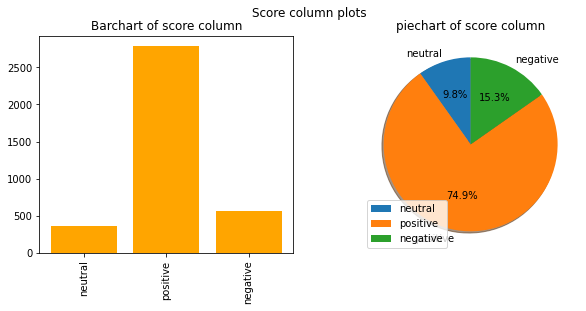

In [ ]:
# Visualize The  score  column using piechart and barchart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['neutral', 'positive', 'negative']

neutral_count = len(cleanTweet[cleanTweet['score'] == "neutral"])
positive_count = len(cleanTweet[cleanTweet['score'] == "positive"])
negative_count = len(cleanTweet[cleanTweet['score'] == "negative"])
sizes = [neutral_count, positive_count, negative_count]
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of score column
ax[0].bar(x=labels, height=[neutral_count, positive_count, negative_count], color='orange')
ax[0].set_title('Barchart of score column')
ax[0].set_xticklabels(labels, rotation=90)

# Create a pie chart of score column based on neutral, positive or negative

ax[1].pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('piechart of score column')
ax[1].legend(labels)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

## Building a classification model

In [ ]:
# Remove rows from cleanTweet where  polarity   =0  (i.e where  score  = Neutral) and reset the frame index.
print(cleanTweet.shape)
cleanTweet = cleanTweet[cleanTweet['score'] != 'neutral']
cleanTweet.shape

(3720, 4)


(3354, 4)

In [ ]:
# Construct a column  scoremap  Use the mapping {'positive':1, 'negative':0} on the  score  column
scoremaps = pd.Series([int(1) if row_val == 'positive' else int(0) for row_val in cleanTweet['score']])
cleanTweet = pd.concat([cleanTweet, scoremaps.rename("scoremap")], axis=1)
cleanTweet.head()

,polarity,original_text,clean_text,score,scoremap
0,0.166667,"🚨Africa is ""in the midst of a full-blown third...",africa midst fullblown third wave coronaviru h...,positive,1.0
1,0.133333,"Dr Moeti is head of WHO in Africa, and one of ...",dr moeti head who africa one best public healt...,positive,1.0
2,0.316667,Thank you @research2note for creating this ama...,thank research2not creat amaz campaign amp tur...,positive,1.0
3,0.086111,"Former Pfizer VP and Virologist, Dr. Michael Y...",former pfizer vp virologist dr michael yeadon ...,positive,1.0
4,0.280000,I think it’s important that we don’t sell COVA...,i think import dont sell covax short it still ...,positive,1.0


In [ ]:
# Create feature and target variables (X,y) from  clean-text  and  scoremap  columns respectively.
cleanTweet.reset_index()
X, y = cleanTweet['clean_text'], cleanTweet['scoremap']

In [ ]:
# Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [ ]:
print(X_train[:5])
print(y_train[:5])
print(X_test[:5])
y_test[:5]

1489    big news up 25800 may kill covid vaccin i bet ...
1632                                                  NaN
7       yet anoth amazingli qualifi courag doctor roge...
300                                                   nan
339     how know covid19 vaccin safe cdc amp us_fda sa...
Name: clean_text, dtype: object
1489    1.0
1632    1.0
7       1.0
300     1.0
339     1.0
Name: scoremap, dtype: float64
1079    it precis peopl have done research find come l...
3136                                                  NaN
2655                                                  NaN
1434                                                  nan
1414    as covid19 vaccin roll across countri import c...
Name: clean_text, dtype: object


1079    1.0
3136    1.0
2655    1.0
1434    1.0
1414    1.0
Name: scoremap, dtype: float64

In [ ]:
# Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
count_vect = CountVectorizer(3,3)
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

In [ ]:
# fill NaN values in y_train with 0
y_train = y_train.fillna(0)

In [ ]:
np.any(np.isnan(y_train))

False

In [ ]:
from sklearn.linear_model import SGDClassifier
# clf = SDGC().fit(X_train_tfidf, twenty_train.target)
clf = SGDClassifier().fit(X_train_counts, y_train)

## Evaluate model

In [ ]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test[:5]

1079    it precis peopl have done research find come l...
3136                                                     
2655                                                     
1434                                                  nan
1414    as covid19 vaccin roll across countri import c...
Name: clean_text, dtype: object

In [ ]:
X_test = X_test.replace(np.nan, '', regex=True)
# use transform not fit_transform
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
# prediction = clf.prevaluedict(X_test_counts)
prediction = clf.predict(X_test_counts)

In [ ]:
np.mean(prediction == y_test)
# 70% acc

0.7079261672095548